# Pymaceuticals Inc.
---

### Analysis
- Sunil Williams <br>
  On the Capomulin regiment, there is a strong correlation between weight and tumor volume. It seems the heavier the mice, the bigger the tumor.
  <br>Mouse L509 showed that while on Capomulin treatment , the Tumor size went down.<br>
  Capomulin and Ramicane showed their tumor volumes to be less than the other two treatments of Infubinol and Ceftamin.<br>
  Popriva had the shortest treatment period which could mean that the mice either recovered or died earlier during the treatment period.<br>
  Mouse g989 was busy running from cage to cage like a ninja and getting tested twice- either way we cleaned the data and she will now be "she who shall not be named."
 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_totalDF = pd.merge(study_results, mouse_metadata,how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_totalDF

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mouse_study_totalDF.loc[mouse_study_totalDF.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mouse_id[0]

'g989'

In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_data= mouse_study_totalDF.loc[mouse_study_totalDF["Mouse ID"] == dup_mouse_id[0]]
dup_mouse_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study= mouse_study_totalDF[~mouse_study_totalDF["Mouse ID"].isin(dup_mouse_id)]
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [91]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# set drug regimen name as index
summary_statistics_index= clean_mouse_study.set_index("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#Create mean, median, standard dev and SEM values
mean_drug = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_drug= clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_drug=clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_err_drug= clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_statistics= pd.DataFrame({
    "Mean Tumor Volume": mean_drug,
    "Median Tumor Volume": median_drug,
    "Tumor Volume Variance": var_drug,
    "Tumor Volume Std. Dev.":std_drug,
    "Tumor Volume Std. Err.":std_err_drug
})

# display dataFRAME
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary_statistics= clean_mouse_study.groupby("Drug Regimen").agg ({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
adv_summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

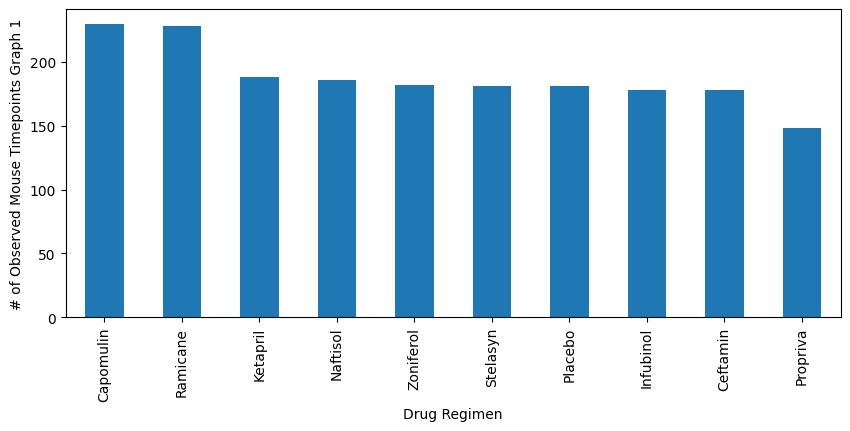

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# for each drug regiment we need to get the totals
drug_regimen_count = clean_mouse_study["Drug Regimen"].value_counts()
#use the count value to plot requested graph
drug_regimen_count.plot( kind= "bar", figsize = (10,4), ylabel= "# of Observed Mouse Timepoints Graph 1")

plt.show

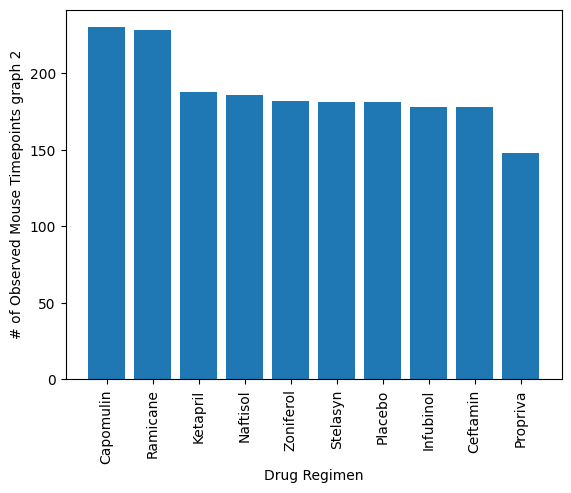

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = clean_mouse_study["Drug Regimen"].value_counts()
drug_regimen_count.head()
#using Drug regimen counts from above we get the array for the drug regiment name (x values)
drug_regimen_count.index.values
# and use .values to the get the y values/ the amount of occurences for timepoint
drug_regimen_count.values
#set x axis and tick locations
plt.bar(drug_regimen_count.index.values,drug_regimen_count.values)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints graph 2")

plt.show()


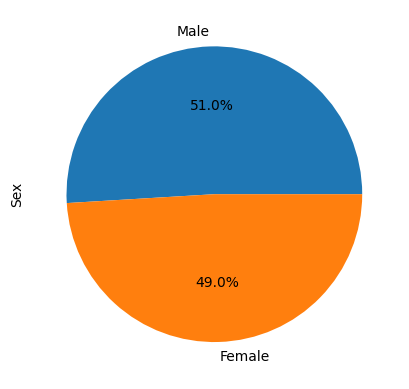

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse=clean_mouse_study["Sex"].value_counts()
sex_mouse.values
sex_mouse.index.values

sex_mouse.plot(kind="pie",autopct="%1.1f%%",ylabel='Sex')

plt.show()

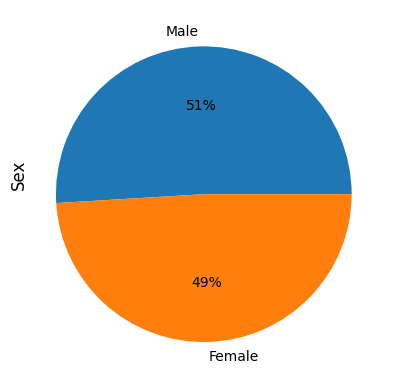

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# use the same format as the bar we get x and y labels from our value counts formula
# get values for sex of mice
sex_mouse=clean_mouse_study["Sex"].value_counts()
# use .values and index.values to get the axis
# plot pie chart
plt.title("Sex", x=0.0, y=0.5, rotation = 90)
plt.pie(sex_mouse.values,labels=sex_mouse.index.values, autopct="%1.0f%%" )

plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Start by getting the last (greatest) timepoint for each mouse, Group by Mouse and then get max time point for each mouse
greatest_time = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()
#reset the index to convert series to dataframe
greatest_time = greatest_time.reset_index()
greatest_time.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [99]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# we will use a left join to only keep the greatest time for each mouse 
merged_data= greatest_time.merge(clean_mouse_study, on= ["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_used = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



In [101]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

#Create loop and use .append to add each series to the tumor volume list
for treatment in regimens_used:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)" ]
    #add each series to the list
    tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound) | (final_tumor_vol > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outlier: None")
    else:
        output= f"{treatment}'s potential outlier: "
        for o in outliers:
            output += f"{o}"
        print(output)
   
 

Capomulin's potential outlier: None
Ramicane's potential outlier: None
Infubinol's potential outlier: 36.3213458
Ceftamin's potential outlier: None


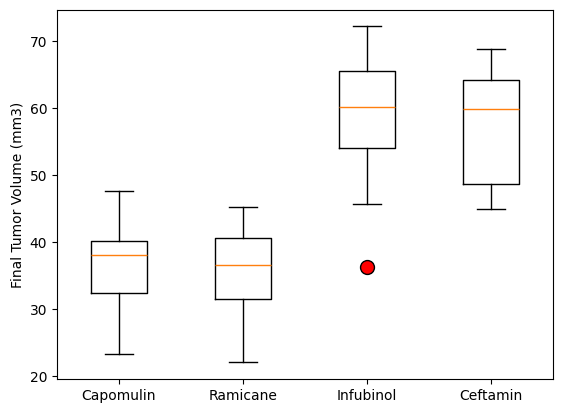

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker ='o', markerfacecolor= 'red', markersize = 10)
plt.boxplot(tumor_vol_list, tick_labels= regimens_used, flierprops=flierprops )
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

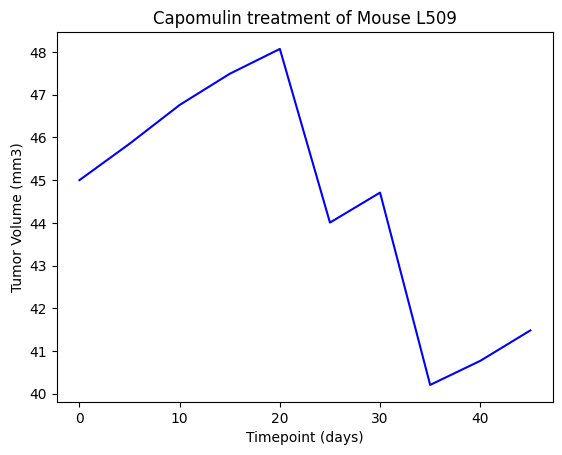

In [103]:

#Using mouse I509
# get the data for the treatment Capomulin
Capomulin_mouse_data= clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
# isolate data for I509 mouse
L509mouse= Capomulin_mouse_data.loc[Capomulin_mouse_data["Mouse ID"]== 'l509']
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.plot(L509mouse["Timepoint"], L509mouse["Tumor Volume (mm3)"], color = 'blue')
plt.title("Capomulin treatment of Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [104]:
Capomulin_mouse_data= clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin"]
Capomulin_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


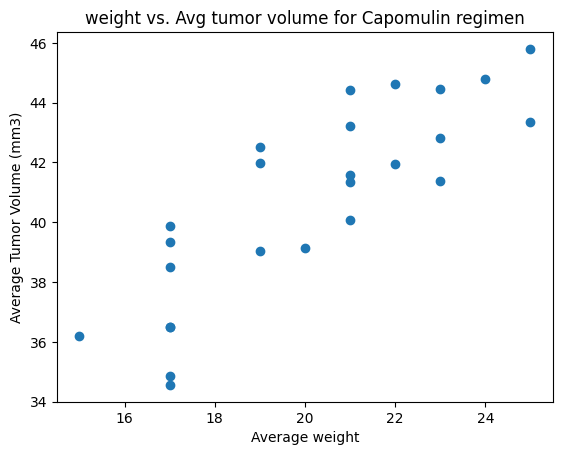

In [105]:
# get the data for the treatment Capomulin
Capomulin_index= Capomulin_mouse_data.set_index("Mouse ID")
avg_Capomulin_mouse_data= Capomulin_index[["Weight (g)","Tumor Volume (mm3)"]].groupby("Mouse ID").mean() # get the averages of weight and volume
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg_Capomulin_mouse_data["Weight (g)"],avg_Capomulin_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Average weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("weight vs. Avg tumor volume for Capomulin regimen")
plt.show()

## Correlation and Regression

0.8419363424694721


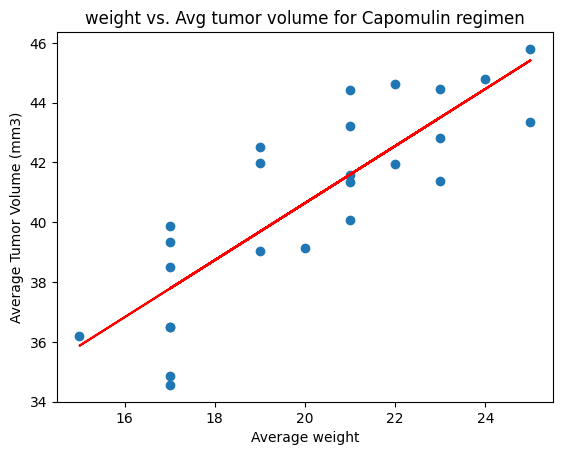

In [106]:
# Calculate the correlation coefficient and a linear regression model
corr= st.pearsonr(avg_Capomulin_mouse_data["Weight (g)"],avg_Capomulin_mouse_data["Tumor Volume (mm3)"])[0]
print(corr)
#create the regression line
xvalues= avg_Capomulin_mouse_data["Weight (g)"]
yvalues= avg_Capomulin_mouse_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_Capomulin_mouse_data["Weight (g)"],
                                                                      avg_Capomulin_mouse_data["Tumor Volume (mm3)"])
regress_values = xvalues * slope + intercept
line_eq = f"y{slope:.2f}x + {intercept:.2f}"
plt.plot(xvalues,regress_values,"r-")
plt.scatter(avg_Capomulin_mouse_data["Weight (g)"],avg_Capomulin_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Average weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("weight vs. Avg tumor volume for Capomulin regimen")
plt.show()

